In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


# Para ajustar datos

In [2]:
def cargar_datos(path, file):
    data = np.loadtxt(path+file, delimiter=",")
    n_medicion, desplazamiento_fourier = data[:, 0], data[:, 1]
    return n_medicion, desplazamiento_fourier


In [24]:
path = "../18-10-2021/"
filename = "Medicion_index.dat"

x, y = cargar_datos(path=path, file=filename)
#x *= 0.050  # En teoria ese es el desplazamieto de la montura
#delta_x = x - x[0]

#delta_y = y - y[0]

# x contiene el numero de desplazamientos
# y contiene la posicion del maximo en el espacio de fourier


In [31]:
# Realizando ajuste

# Definicion del modelo a ajustar
def f(x, a, b):
    y = a*x+b
    return y


# Estimaciones iniciales de los parametros del modelo
p0 = [1.33, 0]
# Ajustando
pars, cov = curve_fit(
    f=f, xdata=x[:], ydata=y[:], p0=p0, bounds=(-np.inf, np.inf))

# Separando parametros
a, b = pars[:]

# Definiendo dominio de la funcion ajustada
x_fit = np.arange(0, 0.32, 0.001)
# Evaluando funcion ajustada
y_fit = f(x_fit, a, b)

# Calculando R-square
ss_res = np.sum((y-f(x, a, b))**2)
ss_tot = np.sum((y-y.mean())**2)
r_square = 1-ss_res/ss_tot

ea , eb = np.sqrt(np.diag(cov))


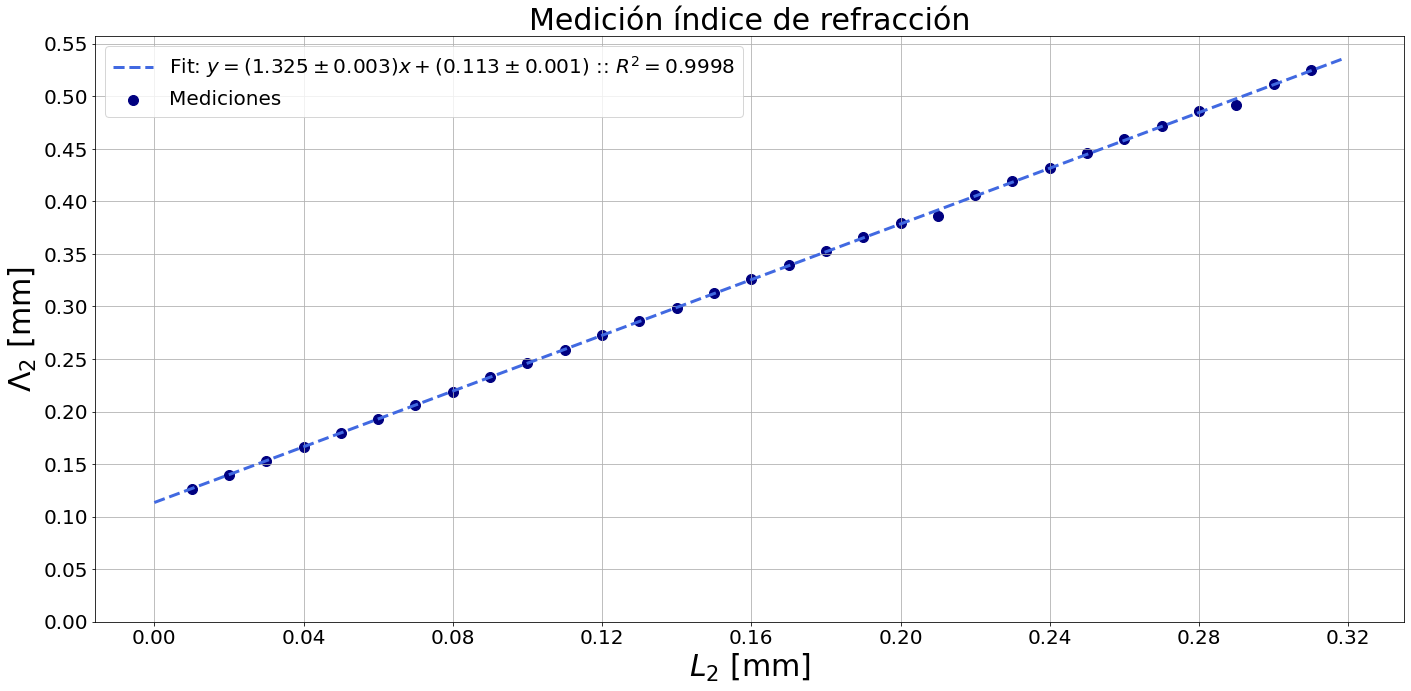

In [41]:

"""
==============================================================================
Graficando resultados
==============================================================================
"""

# Creando figura
fig, ax = plt.subplots(figsize=(20, 10))
# Pone lo mas juntas las graficas posibles
fig.set_tight_layout(True)
# Para que no se empalmen los titulos en los ejes
fig.subplots_adjust(wspace=1.2)

# Cambiando el tamano de la fuente en todos los ejes
plt.rcParams.update({'font.size': 20})

# Graficando el espectro optico inicial
ax = plt.subplot(1, 1, 1)

# Titulo del grafico
ax.set_title(
    label=r"Medición índice de refracción", fontsize=30)


graph_data = ax.scatter(x, y, s=400,
                        marker=".", c="navy", label="Mediciones")


# Decidiendo label fit:
if(b < 0):
    label_fit = r"Fit: $y = (%.3f \pm %.3f)x - (%.3f \pm %.3f$) :: $R^{2}= %.4f$" % (a,ea, np.abs(b),eb, r_square)
else:
    label_fit = r"Fit: $y = (%.3f \pm %.3f)x + (%.3f \pm %.3f$) :: $R^{2}= %.4f$" % (
        a,ea , b,eb, r_square)

graph_fit = ax.plot(x_fit, y_fit, c="royalblue", linestyle="dashed",
                    linewidth=3, label=label_fit)

ax.set_xlabel(r"$L_{2}$ [mm]", fontsize=30)
ax.set_ylabel(r"$\Lambda_{2}$ [mm]", fontsize=30)
ax.grid()
ax.set_xticks(np.arange(0, 0.33, 0.04))
ax.set_yticks(np.arange(0, 0.6, 0.05))
#ax.set_ylim([0, 1300])
ax.legend(loc="best", fontsize=20)
path="/home/alejandro_goper/Documentos/Universidad de Guanajuato/Tesis_de_Licenciatura/Escritura/Imagenes/Parte_2"
plt.savefig(path + "MedIndex_10um.png")
plt.show()


# Grafico de diferencias nominal vs. medida

In [5]:
path = "../18-10-2021/"
filename1 = "analisis_desplazamiento_10um.dat"
#filename2 = "analisis_desplazamiento_100um.dat"
#filename3 = "analisis_desplazamiento_500um.dat"
montura, fourier = cargar_datos(path="", file=filename1)

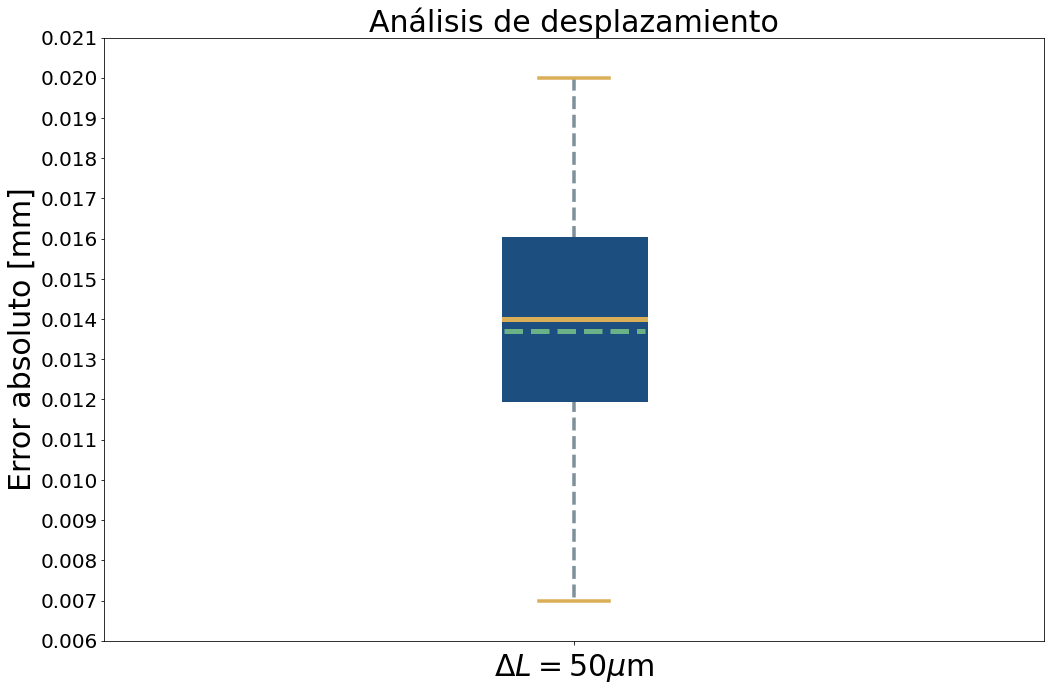

In [79]:
"""
==============================================================================
Graficando resultados
==============================================================================
"""

# Creando figura
fig, ax = plt.subplots(figsize=(15, 10))
# Pone lo mas juntas las graficas posibles
fig.set_tight_layout(True)
# Para que no se empalmen los titulos en los ejes
fig.subplots_adjust(wspace=1.2)

# Cambiando el tamano de la fuente en todos los ejes
plt.rcParams.update({'font.size': 20})

# Graficando el espectro optico inicial
ax = plt.subplot(1, 1, 1)

# Titulo del grafico
ax.set_title(
    label=r"Análisis de desplazamiento", fontsize=30)

medianprops = dict(linestyle='-', linewidth=5, color='#DBAE58')
boxprops = dict(linestyle='-', linewidth=5, color='#1C4E80', 
                facecolor="#1C4E80")
meanlineprops = dict(linestyle='--', linewidth=5, color='#6AB187')
whiskerprops = dict(color="#7E909A", linewidth=3.5, linestyle="--")
capprops=dict(color="#DBAE58",linewidth=3.5)

graph_data = ax.boxplot(fourier-montura, boxprops=boxprops, 
                patch_artist=True, whiskerprops=whiskerprops,
                capprops=capprops,
                flierprops=dict(markerfacecolor='r', marker='s'), 
                vert=True, labels=[r""], medianprops=medianprops, 
                meanprops=meanlineprops, meanline=True,showmeans=True)
ax.set_ylabel(r"Error absoluto [mm]", fontsize=30)
ax.set_xlabel("$\Delta L = 50 \mu$m", fontsize=30)
ax.set_yticks(np.arange(0.006, 0.022, 0.001))
path="/home/alejandro_goper/Documentos/Universidad de Guanajuato/Tesis_de_Licenciatura/Escritura/Imagenes/"
plt.savefig(path + "BP_50um.png")
plt.show()

In [19]:
path = "../18-10-2021/"
filename1 = "analisis_desplazamiento_10um.dat"
filename2 = "analisis_desplazamiento_100um.dat"
filename3 = "analisis_desplazamiento_500um.dat"

montura1, fourier1 = cargar_datos(path=path, file=filename1)
montura2, fourier2 = cargar_datos(path=path, file=filename2)
montura3, fourier3 = cargar_datos(path=path, file=filename3)

d1 = np.abs(fourier1-montura1) 
d2 = np.abs(fourier2-montura2)
d3 = np.abs(fourier3-montura3)
print(d1.mean(), d2.mean(), d3.mean())

0.004455445544554459 0.01481081081081082 0.041035714285714


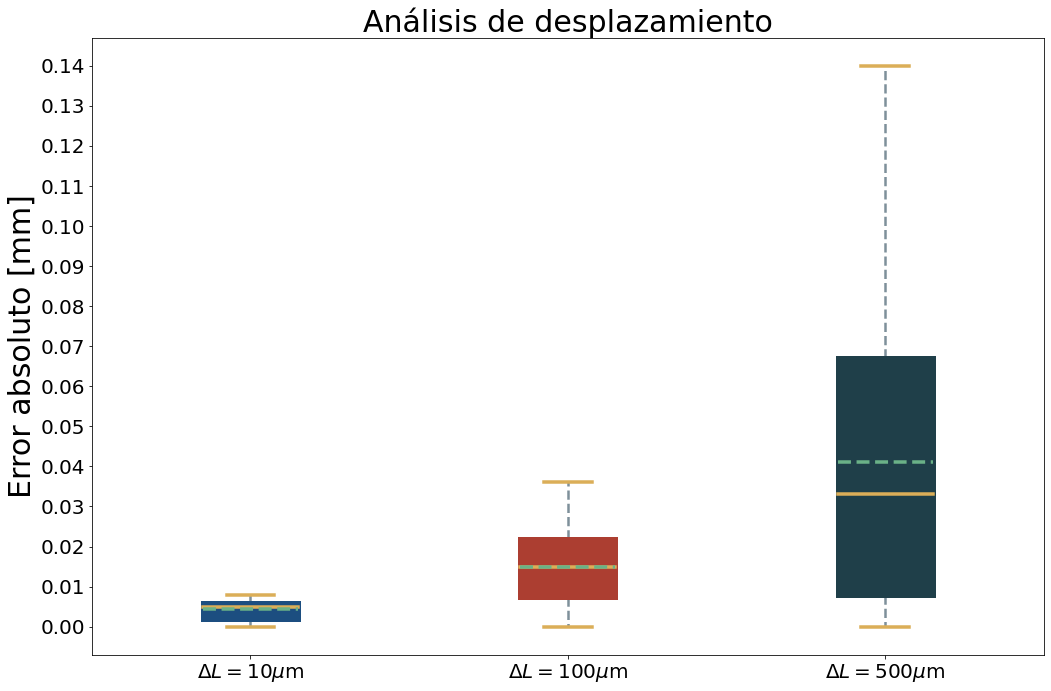

In [20]:
"""
==============================================================================
Graficando resultados
==============================================================================
"""

# Creando figura
fig, ax = plt.subplots(figsize=(15, 10))
# Pone lo mas juntas las graficas posibles
fig.set_tight_layout(True)
# Para que no se empalmen los titulos en los ejes
fig.subplots_adjust(wspace=1.2)

# Cambiando el tamano de la fuente en todos los ejes
plt.rcParams.update({'font.size': 20})

# Graficando
ax = plt.subplot(1, 1, 1)

# Titulo del grafico
ax.set_title(
    label=r"Análisis de desplazamiento", fontsize=30)

medianprops = dict(linestyle='-', linewidth=3.5, color='#DBAE58')
#boxprops = dict(linestyle='-', linewidth=5, color='#1C4E80', 
                #facecolor="#1C4E80") 
meanlineprops = dict(linestyle='--', linewidth=3.5, color='#6AB187')
whiskerprops = dict(color="#7E909A", linewidth=2.5, linestyle="--")
capprops=dict(color="#DBAE58",linewidth=3.5)

data = [np.abs(fourier1-montura1), np.abs(fourier2-montura2), np.abs(fourier3-montura3)]

graph_data = ax.boxplot(data, patch_artist=True, vert=True,#, boxprops=boxprops) 
                whiskerprops=whiskerprops,
                capprops=capprops,
                flierprops=dict(markerfacecolor='r', marker='s'), 
                medianprops=medianprops, 
                meanprops=meanlineprops, meanline=True,showmeans=True)

for box, color in zip(graph_data["boxes"], ["#1C4E80", "#AC3E31", "#1F3F49"]):
    #patch.set_boxprops(boxprops)
    #patch.set_medianprops(medianprops)
    box.set_linestyle("-")
    box.set_color(color)
    box.set_linewidth(5)
    box.set_facecolor(color)

boxs_labels= [r"$\Delta L = 10 \mu$m",r"$\Delta L = 100 \mu$m", r"$\Delta L = 500 \mu$m"]
ax.set_xticklabels(boxs_labels)
#ax.set_xlabel(r"Error absoluto", fontsize=30)
ax.set_ylabel("Error absoluto [mm]", fontsize=30)
ax.set_yticks(np.arange(0., 0.15, 0.01))


path="/home/alejandro_goper/Documentos/Universidad de Guanajuato/Tesis_de_Licenciatura/Escritura/Imagenes/"
plt.savefig(path + "BPS.png")
plt.show()

# Calculando el promedio y la desviacion estandar 

In [38]:
desplazamiento_prom = np.mean(y-y[0])
desplazamiento_std = np.std(y-y[0], ddof=1)
print("L = %.4f \nE_l = %.4f" % (desplazamiento_prom, desplazamiento_std))


L = 0.4642 
E_l = 0.2940


In [24]:
print(y[5]-y[4])


0.047000000000000014


# Para graficar espectros unicos

In [3]:
path = "../23-03-2022/Prueba de control/Referencia.dat"
data = np.loadtxt(path, skiprows=58)
lambda_, dBm_ref = data[:, 0], data[:, 1]

path = "../23-03-2022/Prueba de control/Espectro(1).dat"
data = np.loadtxt(path, skiprows=58)
lambda_, dBm_m = data[:, 0], data[:, 1]

r_dB = dBm_m - dBm_ref 

r = (10**(0.1*r_dB))/25


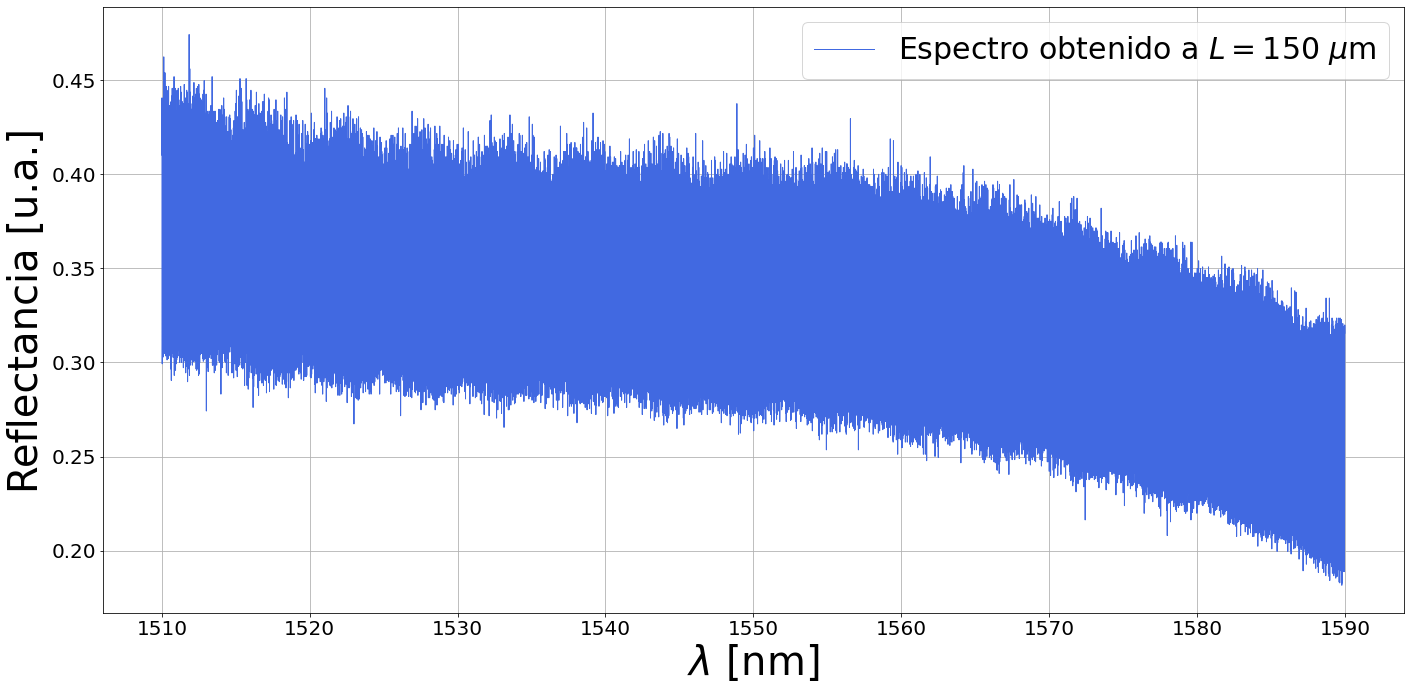

In [5]:
"""
==============================================================================
Graficando resultados
==============================================================================
"""

# Creando figura
fig, ax = plt.subplots(figsize=(20, 10))
# Pone lo mas juntas las graficas posibles
fig.set_tight_layout(True)
# Para que no se empalmen los titulos en los ejes
fig.subplots_adjust(wspace=1.2)

# Cambiando el tamano de la fuente en todos los ejes
plt.rcParams.update({'font.size': 20})

# Graficando el espectro optico inicial
ax = plt.subplot(1, 1, 1)

# Titulo del grafico
ax.set_title(
    label=r"", fontsize=40)


#graph_data = ax.scatter(delta_x, delta_y, s=400,
#                        marker=".", c="navy", label="Mediciones")

graph_fit = ax.plot(lambda_, r, c="royalblue",
                    linewidth=1, label=r"Espectro obtenido a $L=150$ $\mu$m")

ax.set_xlabel(r"$\lambda$ [nm]", fontsize=40)
ax.set_ylabel("Reflectancia [u.a.]", fontsize=40)
ax.grid()
#ax.set_xticks(np.arange(0, 1.1, 0.1))
#ax.set_ylim([0, 1300])
ax.legend(loc="best", fontsize=30)
#plt.savefig(path + filename[0:-4]+".png")
path="/home/alejandro_goper/Documentos/Universidad de Guanajuato/Tesis_de_Licenciatura/Escritura/Imagenes/Parte_3/"
plt.savefig(path + "Prueba_inicial_pt3.png")
plt.show()


# Graficando FFT

In [7]:
from FabryPerot.FFT_support import encontrar_FFT_dominio_en_OPL

path = "../08-10-2021/1GAP-AIRE/Referencia.dat"
data = np.loadtxt(path, skiprows=58)
lambda_, dBm_ref = data[:, 0], data[:, 1]

path = "../18-10-2021/1GAP-CAPILAR-AIRE-100um/Espectro(90).dat"
data = np.loadtxt(path, skiprows=58)
lambda_, dBm_m = data[:, 0], data[:, 1]

r_dB = dBm_m - dBm_ref 

r = (10**(0.1*r_dB))/25

r = r - np.mean(r)

opl,amp = encontrar_FFT_dominio_en_OPL(lambda_[0],lambda_[-1],r)

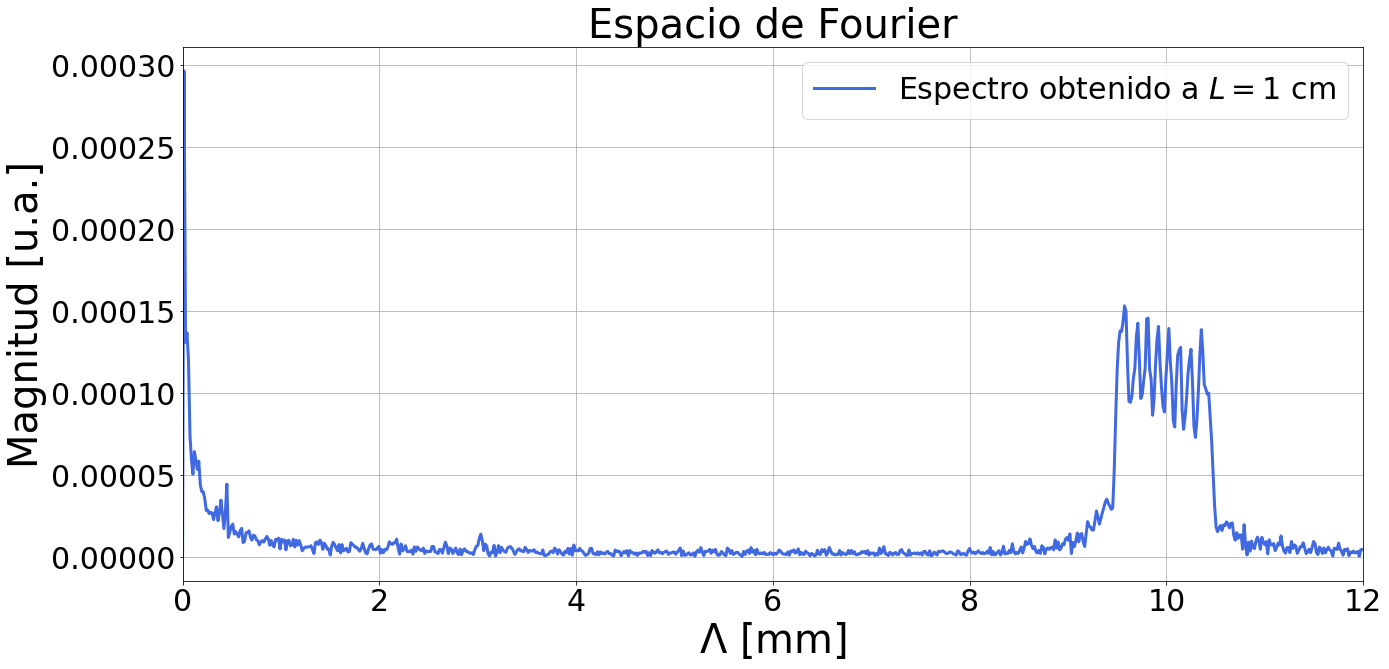

In [8]:
"""
==============================================================================
Graficando resultados
==============================================================================
"""

# Creando figura
fig, ax = plt.subplots(figsize=(20, 10))
# Pone lo mas juntas las graficas posibles
fig.set_tight_layout(True)
# Para que no se empalmen los titulos en los ejes
fig.subplots_adjust(wspace=1.2)

# Cambiando el tamano de la fuente en todos los ejes
plt.rcParams.update({'font.size': 30})

# Graficando el espectro optico inicial
ax = plt.subplot(1, 1, 1)

# Titulo del grafico
ax.set_title(
    label=r"Espacio de Fourier", fontsize=40)


#graph_data = ax.scatter(delta_x, delta_y, s=400,
#                        marker=".", c="navy", label="Mediciones")

graph_fit = ax.plot(opl, amp, c="royalblue",
                    linewidth=3, label=r"Espectro obtenido a $L=1$ cm")

ax.set_xlabel(r"$\Lambda$ [mm]", fontsize=40)
ax.set_ylabel(r"Magnitud [u.a.]", fontsize=40)
ax.grid()
ax.set_xlim([0,12])
#ax.set_xticks(np.arange(0, 1.1, 0.1))
#ax.set_ylim([0, 1300])
ax.legend(loc="best", fontsize=30)
#plt.savefig(path + filename[0:-4]+".png")
path="/home/alejandro_goper/Documentos/Universidad de Guanajuato/Tesis_de_Licenciatura/Escritura/Imagenes/Parte_1/"
plt.savefig(path + "ALG2:L1cm.png")
plt.show()


# Filtrado y enventanado

In [76]:
from FabryPerot.FFT_support import encontrar_FFT_dominio_en_OPL
from FabryPerot.Filtros_support import Filtro, ventana_kaiser_bessel

path = "../08-10-2021/1GAP-AIRE/Referencia.dat"
data = np.loadtxt(path, skiprows=58)
lambda_, dBm_ref = data[:, 0], data[:, 1]

path = "../08-10-2021/1GAP-AIRE/Espectro(21).dat"
data = np.loadtxt(path, skiprows=58)
lambda_, dBm_m = data[:, 0], data[:, 1]

r_dB = dBm_m - dBm_ref 

r = (10**(0.1*r_dB))/25

r = r - np.mean(r)

n = len(r)
lambda_inicial, lambda_final=lambda_[0], lambda_[-1]
# Frec de corte
fc = 3
# Al realizar el cambio de variable beta = 1/lambda, tenemos que 
T_muestreo_beta = (1/lambda_inicial - 1/lambda_final)/n
T_muestreo_beta_opl = T_muestreo_beta*(2*10**6)

# Creando objeto de la clase Filtro
filtro = Filtro(_senal=r, # senal a filtrar
                _T_muestreo=T_muestreo_beta_opl, # Periodo de muestreo
                _frec_corte=fc, # Frecuencia de corte en unidades de T_muestreo
                _orden=901) # Orden del Filtro
# Filtrando por el metodo de las ventanas
senal_filtrada = filtro.filtrar_por_ventana_de_gauss(sigma=0.2)

#opl,amp = encontrar_FFT_dominio_en_OPL(lambda_[0],lambda_[-1],r)

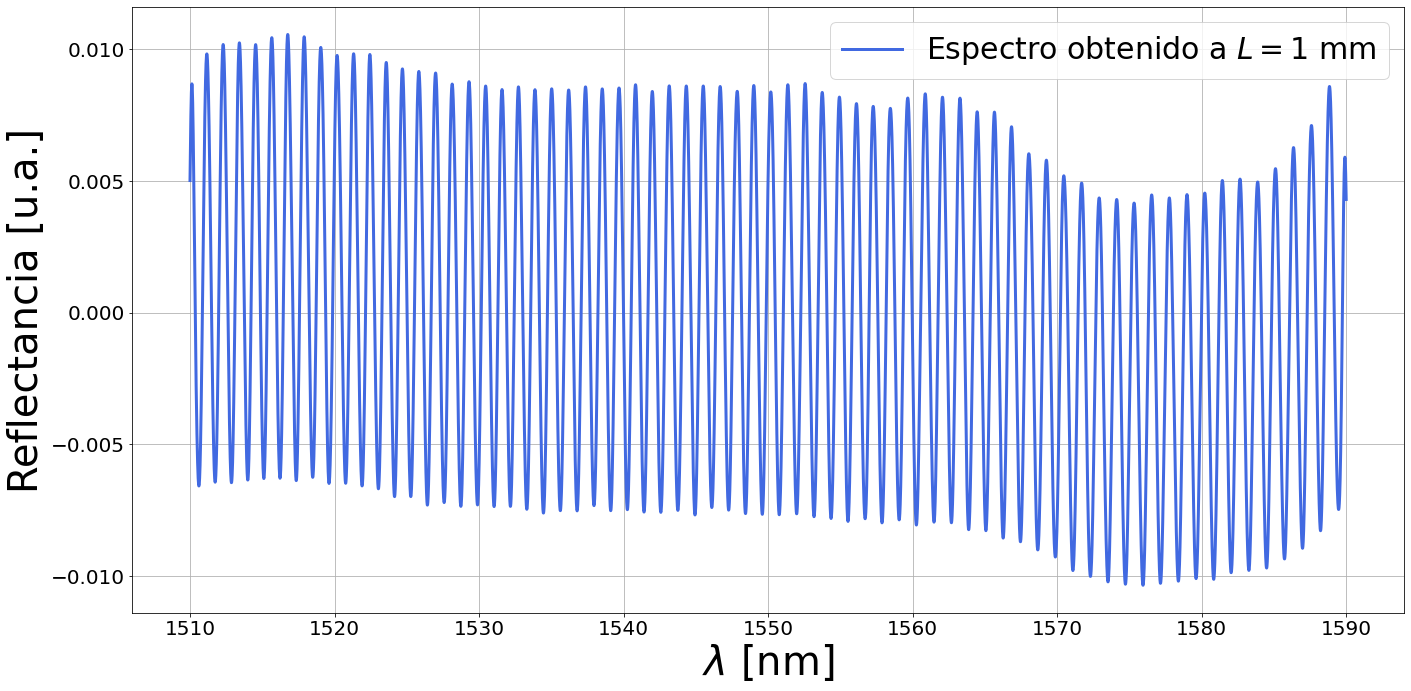

In [78]:
"""
==============================================================================
Graficando resultados
==============================================================================
"""

# Creando figura
fig, ax = plt.subplots(figsize=(20, 10))
# Pone lo mas juntas las graficas posibles
fig.set_tight_layout(True)
# Para que no se empalmen los titulos en los ejes
fig.subplots_adjust(wspace=1.2)

# Cambiando el tamano de la fuente en todos los ejes
plt.rcParams.update({'font.size': 20})

# Graficando el espectro optico inicial
ax = plt.subplot(1, 1, 1)

# Titulo del grafico
ax.set_title(
    label=r"", fontsize=40)


#graph_data = ax.scatter(delta_x, delta_y, s=400,
#                        marker=".", c="navy", label="Mediciones")

graph_fit = ax.plot(lambda_, senal_filtrada, c="royalblue",
                    linewidth=3, label=r"Espectro obtenido a $L=1$ mm")

ax.set_xlabel(r"$\lambda$ [nm]", fontsize=40)
ax.set_ylabel(r"Reflectancia [u.a.]", fontsize=40)
ax.grid()
#ax.set_xlim([0,5])
#ax.set_xticks(np.arange(0, 1.1, 0.1))
#ax.set_ylim([0, 1300])
ax.legend(loc="best", fontsize=30)
#plt.savefig(path + filename[0:-4]+".png")
path="/home/alejandro_goper/Documentos/Universidad de Guanajuato/Tesis_de_Licenciatura/Escritura/Imagenes/Parte_1/"
plt.savefig(path + "ALG3:L1mm_Filtrado.png")
plt.show()


# Filtrado + Windowing

In [3]:

from FabryPerot.FFT_support import encontrar_FFT_dominio_en_OPL
from FabryPerot.Filtros_support import Filtro, ventana_kaiser_bessel

path = "../08-10-2021/1GAP-AIRE/Referencia.dat"
data = np.loadtxt(path, skiprows=58)
lambda_, dBm_ref = data[:, 0], data[:, 1]

path = "../08-10-2021/1GAP-AIRE/Espectro(21).dat"
data = np.loadtxt(path, skiprows=58)
lambda_, dBm_m = data[:, 0], data[:, 1]

r_dB = dBm_m - dBm_ref 

r = (10**(0.1*r_dB))/25

r = r - np.mean(r)

n = len(r)
lambda_inicial, lambda_final=lambda_[0], lambda_[-1]
# Frec de corte
fc = 3
# Al realizar el cambio de variable beta = 1/lambda, tenemos que 
T_muestreo_beta = (1/lambda_inicial - 1/lambda_final)/n
T_muestreo_beta_opl = T_muestreo_beta*(2*10**6)

# Creando objeto de la clase Filtro
filtro = Filtro(_senal=r, # senal a filtrar
                _T_muestreo=T_muestreo_beta_opl, # Periodo de muestreo
                _frec_corte=fc, # Frecuencia de corte en unidades de T_muestreo
                _orden=901) # Orden del Filtro
# Filtrando por el metodo de las ventanas
senal_filtrada = filtro.filtrar_por_ventana_de_gauss(sigma=0.2)

#opl,amp = encontrar_FFT_dominio_en_OPL(lambda_[0],lambda_[-1],r)
"""
    **********************************************************************
    La ventana de Keiser-Bessel es similar a otras ventanas para distintos 
    valores del parametro beta,  por ejemplo:
        - beta = 0 - Ventana cuadrada
        - beta = 5 - Ventana de Hamming 
        - beta = 6 - Ventana de Hanning
        - beta = 8.6 - Ventana de Blackman - Harris
    **********************************************************************
"""
w_n = ventana_kaiser_bessel(orden=n, beta=float(0))

r_P = senal_filtrada*w_n

opl,amp = encontrar_FFT_dominio_en_OPL(lambda_inicial,lambda_final,r_P)


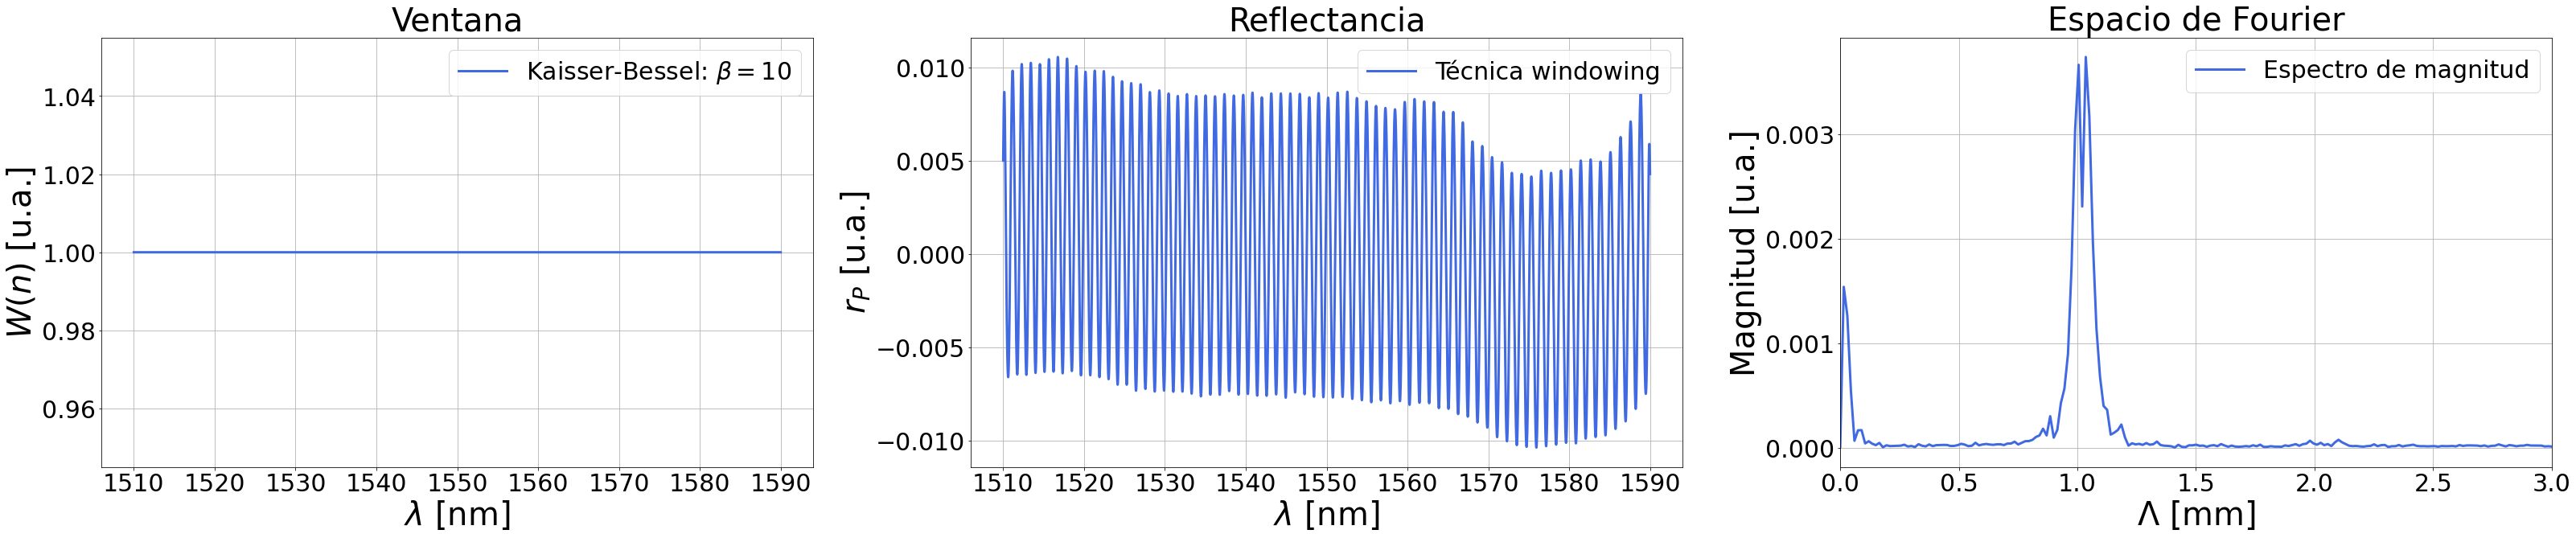

In [4]:
"""
==============================================================================
Graficando resultados
==============================================================================
"""

# Creando figura
fig, ax = plt.subplots(figsize=(45, 10))
# Pone lo mas juntas las graficas posibles
fig.set_tight_layout(True)
# Para que no se empalmen los titulos en los ejes
fig.subplots_adjust(wspace=1.2)

# Cambiando el tamano de la fuente en todos los ejes
plt.rcParams.update({'font.size': 30})

# Graficando el espectro optico inicial
ax = plt.subplot(1, 3, 1)

# Titulo del grafico
ax.set_title(
    label=r"Ventana", fontsize=40)


#graph_data = ax.scatter(delta_x, delta_y, s=400,
#                        marker=".", c="navy", label="Mediciones")

graph_fit = ax.plot(lambda_, w_n, c="royalblue",
                    linewidth=3, label=r"Kaisser-Bessel: $\beta=10$")

ax.set_xlabel(r"$\lambda$ [nm]", fontsize=40)
ax.set_ylabel(r"$W(n)$ [u.a.]", fontsize=40)
ax.grid()
#ax.set_xlim([0,5])
#ax.set_xticks(np.arange(0, 1.1, 0.1))
#ax.set_ylim([0, 1300])
ax.legend(loc="best", fontsize=30)

# Graficando el windowing
ax = plt.subplot(1, 3, 2)

# Titulo del grafico
ax.set_title(
    label=r"Reflectancia", fontsize=40)


#graph_data = ax.scatter(delta_x, delta_y, s=400,
#                        marker=".", c="navy", label="Mediciones")

graph_fit = ax.plot(lambda_, r_P, c="royalblue",
                    linewidth=3, label=r"Técnica windowing")

ax.set_xlabel(r"$\lambda$ [nm]", fontsize=40)
ax.set_ylabel(r"$r_{P}$ [u.a.]", fontsize=40)
ax.grid()
#ax.set_xlim([0,5])
#ax.set_xticks(np.arange(0, 1.1, 0.1))
#ax.set_ylim([0, 1300])
ax.legend(loc="best", fontsize=30)

# Graficando el FFT
ax = plt.subplot(1, 3, 3)

# Titulo del grafico
ax.set_title(
    label=r"Espacio de Fourier", fontsize=40)


#graph_data = ax.scatter(delta_x, delta_y, s=400,
#                        marker=".", c="navy", label="Mediciones")

graph_fit = ax.plot(opl, amp, c="royalblue",
                    linewidth=3, label=r"Espectro de magnitud")

ax.set_xlabel(r"$\Lambda$ [mm]", fontsize=40)
ax.set_ylabel(r"Magnitud [u.a.]", fontsize=40)
ax.grid()
ax.set_xlim([0,3])
#ax.set_xticks(np.arange(0, 1.1, 0.1))
#ax.set_ylim([0, 1300])
ax.legend(loc="best", fontsize=30)


#path="/home/alejandro_goper/Documentos/Universidad de Guanajuato/Tesis_de_Licenciatura/Escritura/Imagenes/Parte_1/"
#plt.savefig(path + "ALG3:L1mm_Windowing.png")
plt.show()


# Dominio Optico y Fourier

In [3]:
from FabryPerot.FFT_support import encontrar_FFT_dominio_en_OPL
from FabryPerot.Filtros_support import Filtro, ventana_kaiser_bessel

path = "../23-03-2022_Part2/2x/30um/Referencia.dat"
data = np.loadtxt(path, skiprows=58)
lambda_, dBm_ref = data[:, 0], data[:, 1]

path = "../23-03-2022_Part2/2x/30um/Espectro(4).dat"
data = np.loadtxt(path, skiprows=58)
lambda_, dBm_m = data[:, 0], data[:, 1]

r_dB = dBm_m - dBm_ref 

r = (10**(0.1*r_dB))/25

r = r - np.mean(r)

n = len(r)
lambda_inicial, lambda_final=lambda_[0], lambda_[-1]
# Frec de corte
fc = 3
# Al realizar el cambio de variable beta = 1/lambda, tenemos que 
T_muestreo_beta = (1/lambda_inicial - 1/lambda_final)/n
T_muestreo_beta_opl = T_muestreo_beta*(2*10**6)

# Creando objeto de la clase Filtro
filtro = Filtro(_senal=r, # senal a filtrar
                _T_muestreo=T_muestreo_beta_opl, # Periodo de muestreo
                _frec_corte=fc, # Frecuencia de corte en unidades de T_muestreo
                _orden=901) # Orden del Filtro
# Filtrando por el metodo de las ventanas
senal_filtrada = filtro.filtrar_por_ventana_de_gauss(sigma=0.2)



#opl,amp = encontrar_FFT_dominio_en_OPL(lambda_[0],lambda_[-1],r)
"""
    **********************************************************************
    La ventana de Keiser-Bessel es similar a otras ventanas para distintos 
    valores del parametro beta,  por ejemplo:
        - beta = 0 - Ventana cuadrada
        - beta = 5 - Ventana de Hamming 
        - beta = 6 - Ventana de Hanning
        - beta = 8.6 - Ventana de Blackman - Harris
    **********************************************************************
"""
w_n1 = ventana_kaiser_bessel(orden=n, beta=float(10))
#w_n2 = ventana_kaiser_bessel(orden=n, beta=float(6))
#w_n3 = ventana_kaiser_bessel(orden=n, beta=float(100))

r_P1 = senal_filtrada*w_n1
#r_P2 = senal_filtrada*w_n2
#r_P3 = senal_filtrada*w_n3


"""
======================================================================
Mejoramiento de la resolucion en Fourier post-windowing
======================================================================
"""

# Mejorando la resolucion del espectro añadiendo 0 a los extremos del 
# array

# Numero de ceros a agregar en cada extremo
n_zeros = 0

"""
**********************************************************************
Empiricamente se ha determinado que cuando n_zeros > 10 000 entonces
el espectro se desplaza por lo que se sugiere usar 0 < n_zeros < 1000
**********************************************************************
"""
zeros = list(np.zeros(n_zeros))

# Agregamos los ceros a cada extremo de la señal
senal_mejorada = zeros + list(r_P1)
senal_mejorada = np.array(senal_mejorada + zeros)

T_muestreo_lambda = (lambda_final-lambda_inicial)/n

# Agregando las correspondientes longitudes de onda (virtuales) 
# correspondientes a los ceros añadidos a los extremos 
lambda_mejorada = np.arange(1510-n_zeros*T_muestreo_lambda, 
                            1590 + n_zeros*T_muestreo_lambda-0.00001,
                            T_muestreo_lambda) 
# Le agregamos un -0.00001 al final del segun parametro para asegurar 
# que la longitud de lambda_mejorada sea la misma que la de la senal 
# enventanada dado que si se lo quitamos en ocaciones la longitud 
# difiere por un valor  



opl1,amp1 = encontrar_FFT_dominio_en_OPL(lambda_mejorada[0],lambda_mejorada[-1],senal_mejorada)
#opl2,amp2 = encontrar_FFT_dominio_en_OPL(lambda_inicial,lambda_final,r_P2)
#opl3,amp3 = encontrar_FFT_dominio_en_OPL(lambda_inicial,lambda_final,r_P3)


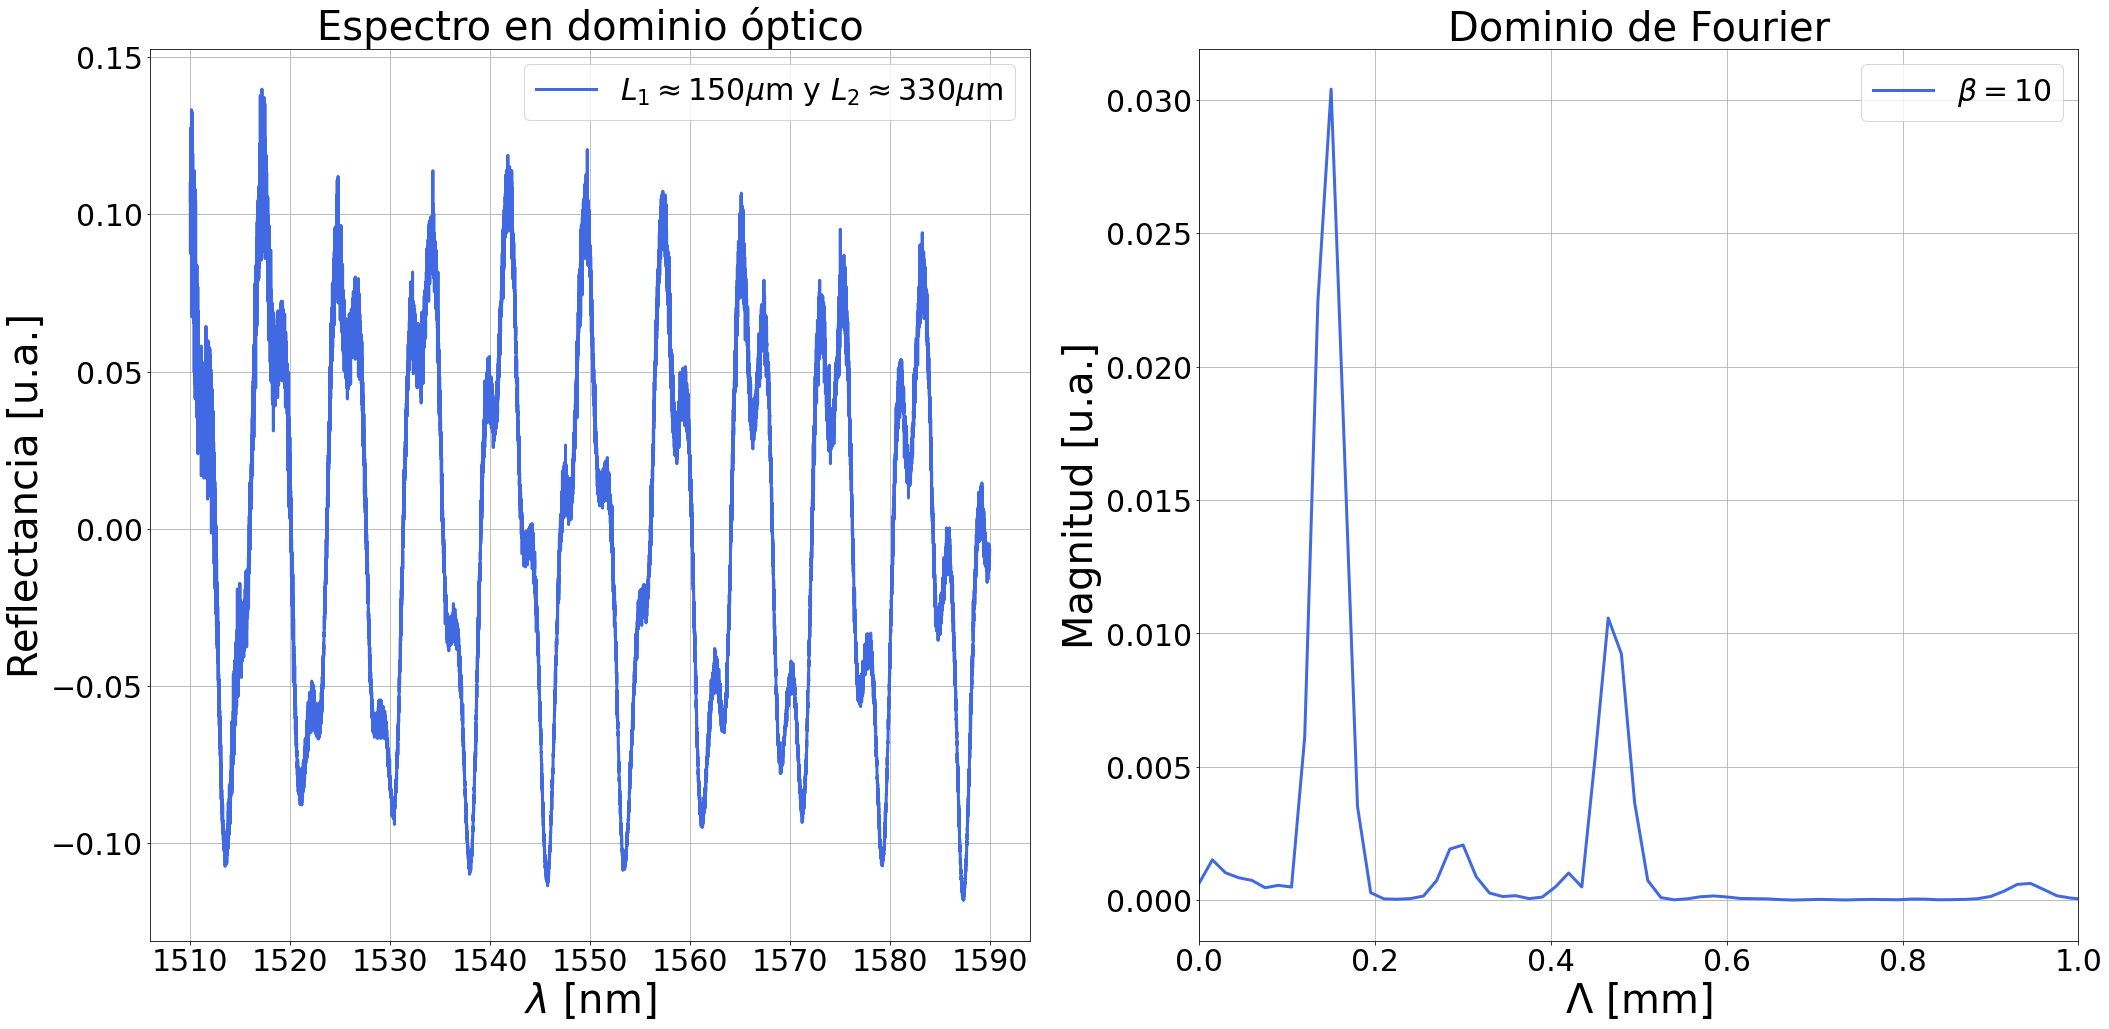

In [4]:
"""
==============================================================================
Graficando resultados
==============================================================================
"""

# Creando figura
fig, ax = plt.subplots(figsize=(30, 15))
# Pone lo mas juntas las graficas posibles
fig.set_tight_layout(True)
# Para que no se empalmen los titulos en los ejes
fig.subplots_adjust(wspace=1.2)

# Cambiando el tamano de la fuente en todos los ejes
plt.rcParams.update({'font.size': 30})

# Graficando el espectro optico inicial
ax = plt.subplot(1, 2, 1)

# Titulo del grafico
ax.set_title(
    label=r"Espectro en dominio óptico", fontsize=40)


#graph_data = ax.scatter(delta_x, delta_y, s=400,
#                        marker=".", c="navy", label="Mediciones")

graph_fit = ax.plot(lambda_, r, c="royalblue",
                    linewidth=3, label=r"$L_{1}\approx 150 \mu$m y $L_{2} \approx 330 \mu$m")

ax.set_xlabel(r"$\lambda$ [nm]", fontsize=40)
ax.set_ylabel(r"Reflectancia [u.a.]", fontsize=40)
ax.grid()
#ax.set_xlim([0,5])
#ax.set_xticks(np.arange(0, 1.1, 0.1))
#ax.set_ylim([0, 1300])
ax.legend(loc="best", fontsize=30)

# Graficando el windowing
ax = plt.subplot(1, 2, 2)

# Titulo del grafico
ax.set_title(
    label=r"Dominio de Fourier", fontsize=40)


#graph_data = ax.scatter(delta_x, delta_y, s=400,
#                        marker=".", c="navy", label="Mediciones")

graph_fit = ax.plot(opl1, amp1, c="royalblue",
                    linewidth=3, label=r"$\beta = 10$")

ax.set_xlabel(r"$\Lambda$ [mm]", fontsize=40)
ax.set_ylabel(r"Magnitud [u.a.]", fontsize=40)
ax.grid()
ax.set_xlim([0,1])
#ax.set_xlim([0,5])
#ax.set_xticks(np.arange(0, 1.1, 0.1))
#ax.set_ylim([0, 1300])
ax.legend(loc="best", fontsize=30)

# Graficando el FFT
#ax = plt.subplot(2, 2, 3)

# Titulo del grafico
#ax.set_title(
#    label=r"Espacio de Fourier", fontsize=40)


#graph_data = ax.scatter(delta_x, delta_y, s=400,
#                        marker=".", c="navy", label="Mediciones")

#graph_fit = ax.plot(opl2, amp2, c="royalblue",
#                    linewidth=3, label=r"$\beta=6$")

#ax.set_xlabel(r"$\Lambda$ [mm]", fontsize=40)
#ax.set_ylabel(r"Magnitud [u.a.]", fontsize=40)
#ax.grid()
#ax.set_xlim([0,0.5])
# Graficando el FFT
#ax = plt.subplot(2, 2, 4)

# Titulo del grafico
#ax.set_title(
#    label=r"Espacio de Fourier", fontsize=40)


#graph_data = ax.scatter(delta_x, delta_y, s=400,
#                        marker=".", c="navy", label="Mediciones")

#graph_fit = ax.plot(opl3, amp3, c="royalblue",
#                    linewidth=3, label=r"$\beta=10$")

#ax.set_xlabel(r"$\Lambda$ [mm]", fontsize=40)
#ax.set_ylabel(r"Magnitud [u.a.]", fontsize=40)
#ax.grid()
#ax.set_xlim([0,0.5])
#ax.set_xticks(np.arange(0, 1.1, 0.1))
#ax.set_ylim([0, 1300])
#ax.legend(loc="best", fontsize=30)


path="/home/alejandro_goper/Documentos/Universidad de Guanajuato/Tesis_de_Licenciatura/Escritura/Imagenes/Parte_3/"
plt.savefig(path + "Prueba_2x_30um_pt3.png")
plt.show()

# Graficar dominio optico y de Fourier

In [26]:
import numpy as np
from FabryPerot.FFT_support import encontrar_FFT_dominio_en_OPL
from FabryPerot.Filtros_support import Filtro, ventana_kaiser_bessel

path = "../04-03-2022/Efecto Vernier/Aire-Glicerina/100um/Referencia.dat"
data = np.loadtxt(path, skiprows=58)
lambda_, dBm_ref = data[:, 0], data[:, 1]

path = "../04-03-2022/Efecto Vernier/Aire-Glicerina/100um//Espectro(4).dat"
data = np.loadtxt(path, skiprows=58)
lambda_, dBm_m = data[:, 0], data[:, 1]

r_dB = dBm_m - dBm_ref 

r = (10**(0.1*r_dB))/25

r = r - np.mean(r)

n = len(r)

lambda_inicial, lambda_final=lambda_[0], lambda_[-1]


# Frec de corte
fc = 3
# Al realizar el cambio de variable beta = 1/lambda, tenemos que 
T_muestreo_beta = (1/lambda_inicial - 1/lambda_final)/n
T_muestreo_beta_opl = T_muestreo_beta*(2*10**6)


# Creando objeto de la clase Filtro
filtro = Filtro(_senal=r, # senal a filtrar
                _T_muestreo=T_muestreo_beta_opl, # Periodo de muestreo
                _frec_corte=fc, # Frecuencia de corte en unidades de T_muestreo
                _orden=901) # Orden del Filtro
# Filtrando por el metodo de las ventanas
senal_filtrada = filtro.filtrar_por_ventana_de_gauss(sigma=0.2)

"""
    **********************************************************************
    La ventana de Keiser-Bessel es similar a otras ventanas para distintos 
    valores del parametro beta,  por ejemplo:
        - beta = 0 - Ventana cuadrada
        - beta = 5 - Ventana de Hamming 
        - beta = 6 - Ventana de Hanning
        - beta = 8.6 - Ventana de Blackman - Harris
    **********************************************************************
"""
w_n1 = ventana_kaiser_bessel(orden=n, beta=float(50))
w_n2 = ventana_kaiser_bessel(orden=n, beta=float(6))
w_n3 = ventana_kaiser_bessel(orden=n, beta=float(100))

r_P1 = senal_filtrada*w_n1

"""
======================================================================
Mejoramiento de la resolucion en Fourier post-windowing
======================================================================
"""

# Mejorando la resolucion del espectro añadiendo 0 a los extremos del 
# array

# Numero de ceros a agregar en cada extremo
n_zeros = 5000

"""
**********************************************************************
Empiricamente se ha determinado que cuando n_zeros > 10 000 entonces
el espectro se desplaza por lo que se sugiere usar 0 < n_zeros < 1000
**********************************************************************
"""
zeros = list(np.zeros(n_zeros))

# Agregamos los ceros a cada extremo de la señal
r_P1 = zeros + list(r_P1)
r_P1 = np.array(r_P1 + zeros)
T_muestreo_lambda = 0.005
# Agregando las correspondientes longitudes de onda (virtuales) 
# correspondientes a los ceros añadidos a los extremos 
lambda_mejorada = np.arange(1510-n_zeros*T_muestreo_lambda, 
                            1590 + n_zeros*T_muestreo_lambda-0.00001,
                            T_muestreo_lambda) 
# Le agregamos un -0.00001 al final del segun parametro para asegurar 
# que la longitud de lambda_mejorada sea la misma que la de la senal 
# enventanada dado que si se lo quitamos en ocaciones la longitud 
# difiere por un valor  

opl1,amp1 = encontrar_FFT_dominio_en_OPL(lambda_mejorada[0],lambda_mejorada[-1],r_P1)


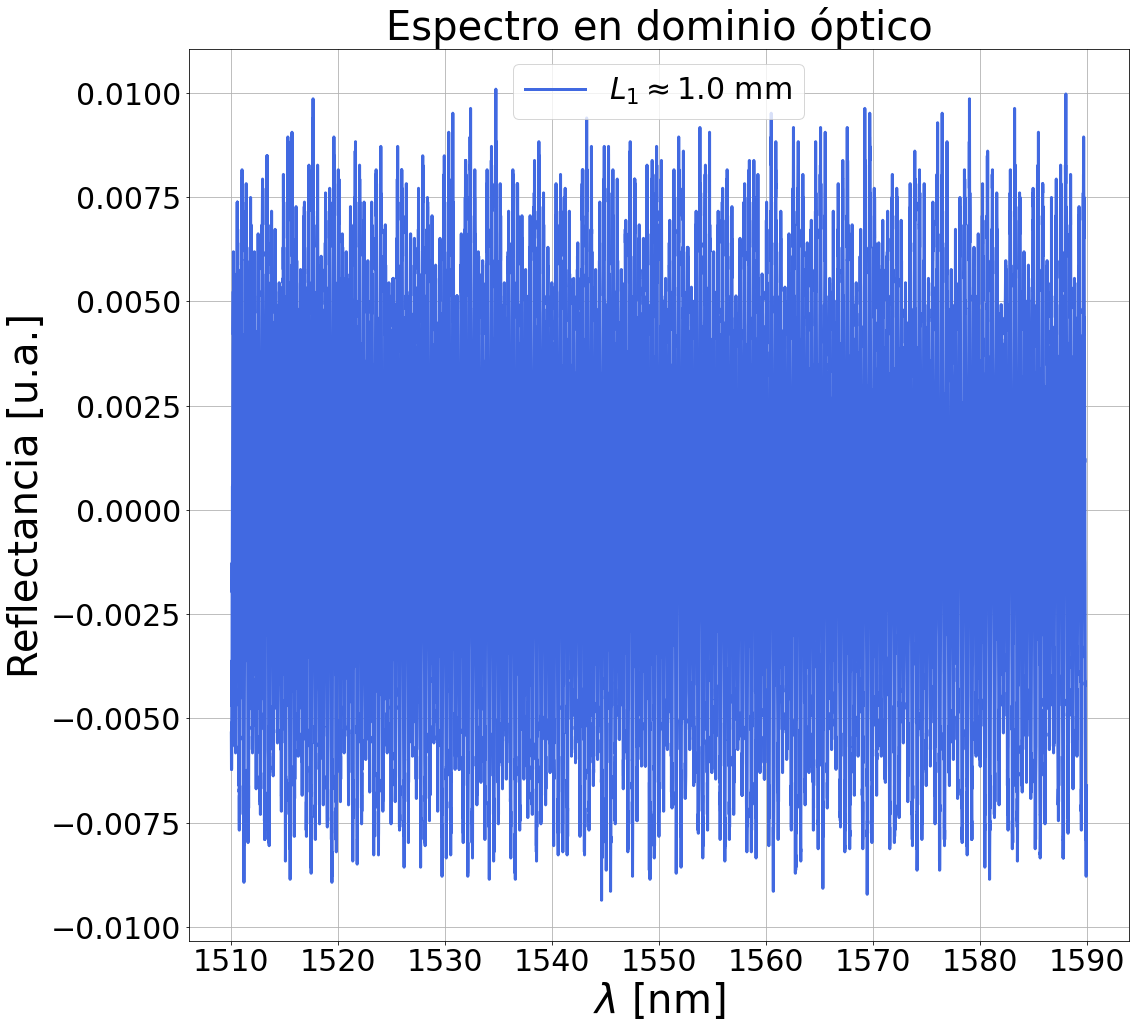

In [27]:
"""
==============================================================================
Graficando resultados
==============================================================================
"""

# Creando figura
fig, ax = plt.subplots(figsize=(30, 15))
# Pone lo mas juntas las graficas posibles
fig.set_tight_layout(True)
# Para que no se empalmen los titulos en los ejes
fig.subplots_adjust(wspace=1.2)

# Cambiando el tamano de la fuente en todos los ejes
plt.rcParams.update({'font.size': 30})

# Graficando el espectro optico inicial
ax = plt.subplot(1, 2, 1)

# Titulo del grafico
ax.set_title(
    label=r"Espectro en dominio óptico", fontsize=40)

graph_ = ax.plot(lambda_, r, c="royalblue",
                    linewidth=3, label=r"$L_{1} \approx 1.0$ mm")

ax.set_xlabel(r"$\lambda$ [nm]", fontsize=40)
ax.set_ylabel(r"Reflectancia [u.a.]", fontsize=40)
ax.grid()
#ax.set_xlim([0,5])
#ax.set_xticks(np.arange(0, 1.1, 0.1))
#ax.set_ylim([0, 1300])
ax.legend(loc="best", fontsize=30)


# Graficando Fourier
#ax = plt.subplot(1, 2, 2)

# Titulo del grafico
#ax.set_title(
#    label=r"Dominio de Fourier", fontsize=40)

#graph_fit = ax.plot(opl1, amp1, c="teal",
#                    linewidth=3, label=r"$\beta = 50$")

#ax.set_xlabel(r"$\Lambda$ [mm]", fontsize=40)
#ax.set_ylabel(r"Magnitud [u.a.]", fontsize=40)
#ax.grid()
#ax.set_xlim([0,3])
#ax.set_xlim([0,5])
#ax.set_xticks(np.arange(0, 1.1, 0.1))
#ax.set_ylim([0, 1300])
#ax.legend(loc="best", fontsize=30)


path="/home/alejandro_goper/Documentos/Universidad de Guanajuato/Tesis_de_Licenciatura/Escritura/Imagenes/Parte_2/"
plt.savefig(path + "Evidencia_absorcion4.png")
plt.show()

# Graficar modelo FPI 2 CAVIDADES

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from FabryPerot.Clase import FabryPerot_2GAP
from FabryPerot.FFT_support import encontrar_FFT_dominio_en_OPL
from FabryPerot.Filtros_support import Filtro, ventana_de_hanning, ventana_de_gauss, ventana_flattop, ventana_kaiser_bessel
from scipy.signal import find_peaks
from sklearn.neighbors import NearestNeighbors



"""
==============================================================================
Cargando simulación
==============================================================================
"""

lambda_inicial = 1510 #nm

lambda_final = 1590 #nm

T_muestreo_lambda = 0.005 #nm

# Definicion del dominio en longitudes de onda
lambda_ = np.arange(lambda_inicial,lambda_final+T_muestreo_lambda, T_muestreo_lambda) #nanometros


# Construyendo señal a analizar en el dominio de fourier
obj = FabryPerot_2GAP(lambda_inicial=lambda_inicial,
                      lambda_final= lambda_final,
                      T_muestreo_lambda= 0.005,
                      L_medio_1 = 0.387, 
                      L_medio_2= 1.0, 
                      eta_medio_1 = 1.0002926, 
                      eta_medio_2 = 1.667,
                      alpha_medio_1=0.75,
                      alpha_medio_2=0.15,
                      A_interfaz_1 = 0.75,
                      A_interfaz_2= 0.25,
                      R_3=0.85)

r = obj.Reflectancia()

r = r - np.mean(r)

n = len(r)
lambda_inicial, lambda_final=lambda_[0], lambda_[-1]
# Frec de corte
fc = 6
# Al realizar el cambio de variable beta = 1/lambda, tenemos que 
T_muestreo_beta = (1/lambda_inicial - 1/lambda_final)/n
T_muestreo_beta_opl = T_muestreo_beta*(2*10**6)

# Creando objeto de la clase Filtro
filtro = Filtro(_senal=r, # senal a filtrar
                _T_muestreo=T_muestreo_beta_opl, # Periodo de muestreo
                _frec_corte=fc, # Frecuencia de corte en unidades de T_muestreo
                _orden=901) # Orden del Filtro
# Filtrando por el metodo de las ventanas
senal_filtrada = filtro.filtrar_por_ventana_de_gauss(sigma=0.2)

#opl,amp = encontrar_FFT_dominio_en_OPL(lambda_[0],lambda_[-1],r)
"""
    **********************************************************************
    La ventana de Keiser-Bessel es similar a otras ventanas para distintos 
    valores del parametro beta,  por ejemplo:
        - beta = 0 - Ventana cuadrada
        - beta = 5 - Ventana de Hamming 
        - beta = 6 - Ventana de Hanning
        - beta = 8.6 - Ventana de Blackman - Harris
    **********************************************************************
"""
w_n1 = ventana_kaiser_bessel(orden=n, beta=float(10))
#w_n2 = ventana_kaiser_bessel(orden=n, beta=float(6))
#w_n3 = ventana_kaiser_bessel(orden=n, beta=float(100))

r_P1 = senal_filtrada*w_n1
#r_P2 = senal_filtrada*w_n2
#r_P3 = senal_filtrada*w_n3

opl1,amp1 = encontrar_FFT_dominio_en_OPL(lambda_inicial,lambda_final,r_P1)
#opl2,amp2 = encontrar_FFT_dominio_en_OPL(lambda_inicial,lambda_final,r_P2)
#opl3,amp3 = encontrar_FFT_dominio_en_OPL(lambda_inicial,lambda_final,r_P3)


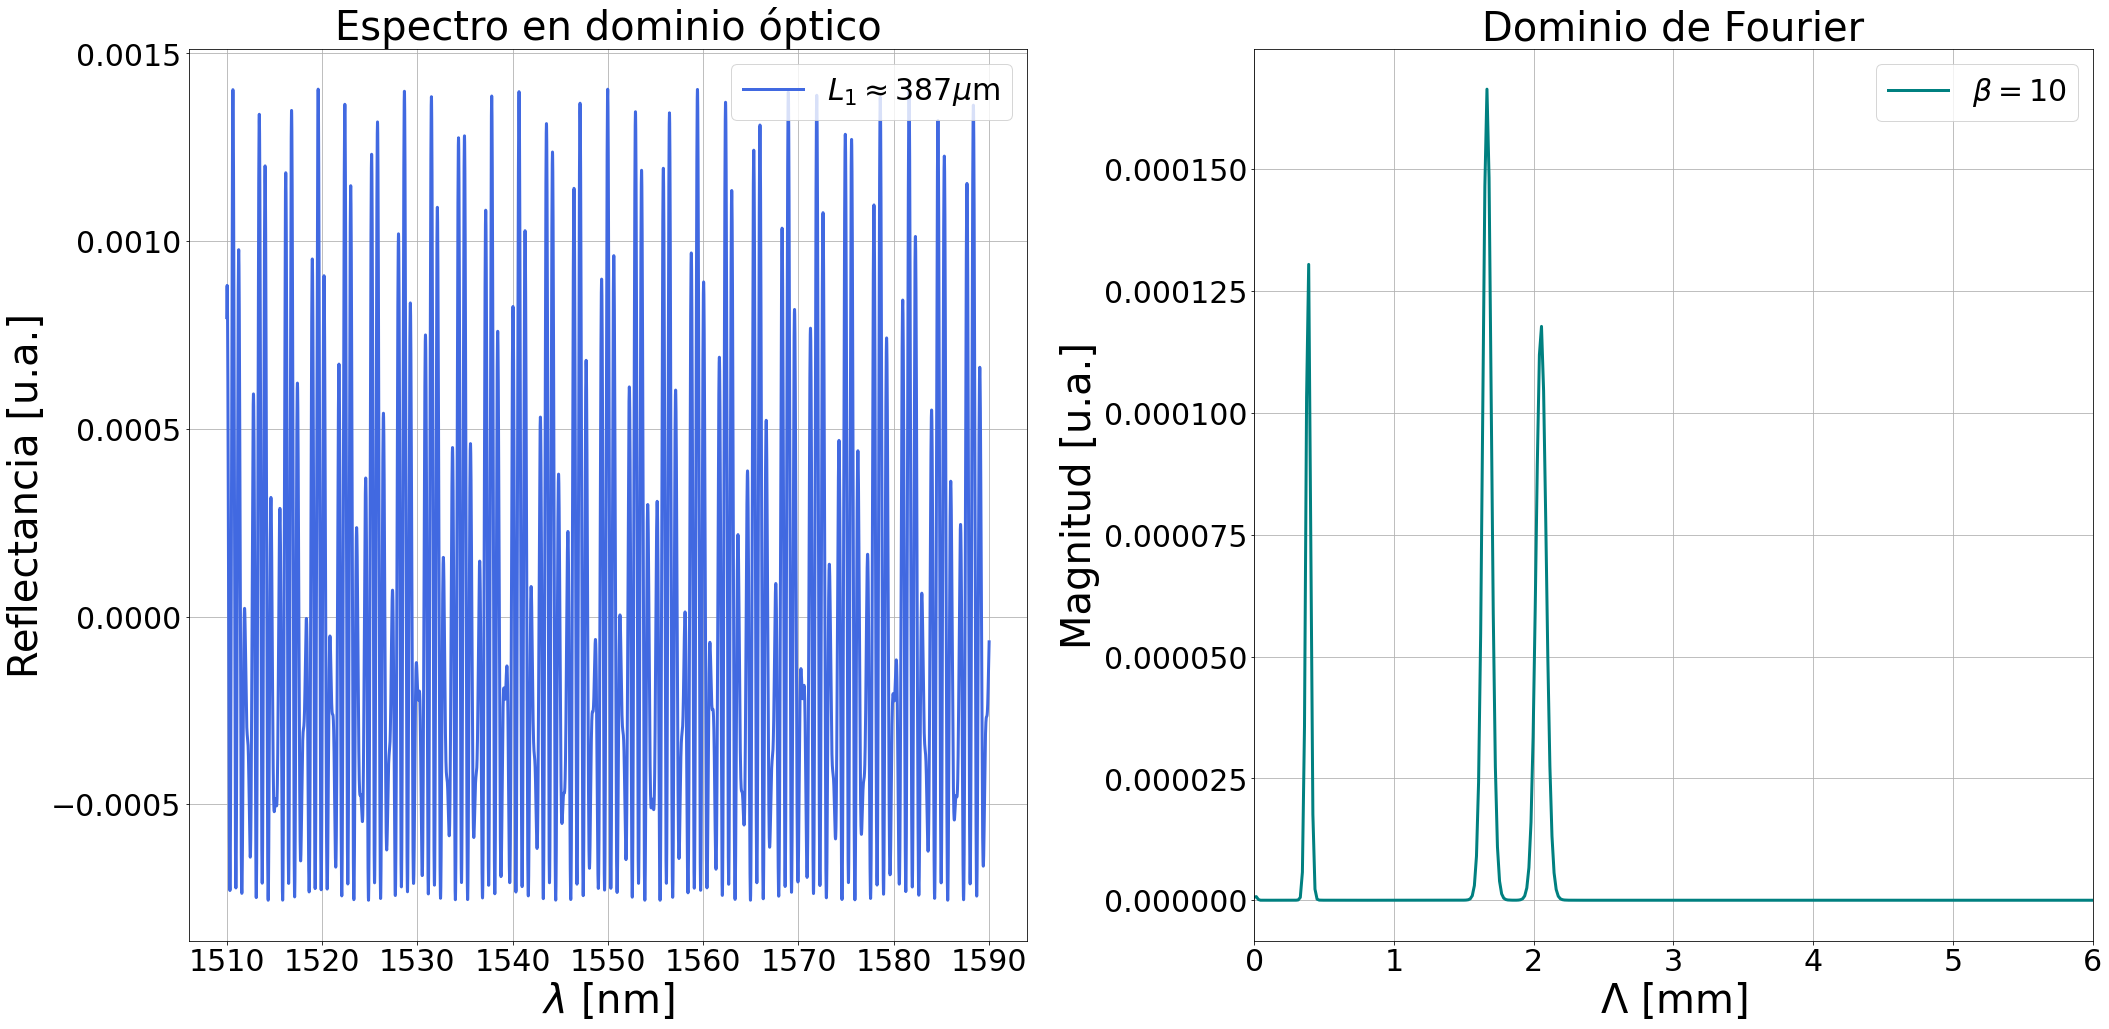

In [79]:
"""
==============================================================================
Graficando resultados
==============================================================================
"""

# Creando figura
fig, ax = plt.subplots(figsize=(30, 15))
# Pone lo mas juntas las graficas posibles
fig.set_tight_layout(True)
# Para que no se empalmen los titulos en los ejes
fig.subplots_adjust(wspace=1.2)

# Cambiando el tamano de la fuente en todos los ejes
plt.rcParams.update({'font.size': 30})

# Graficando el espectro optico inicial
ax = plt.subplot(1, 2, 1)

# Titulo del grafico
ax.set_title(
    label=r"Espectro en dominio óptico", fontsize=40)


#graph_data = ax.scatter(delta_x, delta_y, s=400,
#                        marker=".", c="navy", label="Mediciones")

graph_fit = ax.plot(lambda_, r, c="royalblue",
                    linewidth=3, label=r"$L_{1}\approx 387 \mu$m")

ax.set_xlabel(r"$\lambda$ [nm]", fontsize=40)
ax.set_ylabel(r"Reflectancia [u.a.]", fontsize=40)
ax.grid()
#ax.set_xlim([0,5])
#ax.set_xticks(np.arange(0, 1.1, 0.1))
#ax.set_ylim([0, 1300])
ax.legend(loc="best", fontsize=30)

# Graficando el windowing
ax = plt.subplot(1, 2, 2)

# Titulo del grafico
ax.set_title(
    label=r"Dominio de Fourier", fontsize=40)


#graph_data = ax.scatter(delta_x, delta_y, s=400,
#                        marker=".", c="navy", label="Mediciones")

graph_fit = ax.plot(opl1, amp1, c="teal",
                    linewidth=3, label=r"$\beta = 10$")

ax.set_xlabel(r"$\Lambda$ [mm]", fontsize=40)
ax.set_ylabel(r"Magnitud [u.a.]", fontsize=40)
ax.grid()
ax.set_xlim([0,6])
#ax.set_xlim([0,5])
#ax.set_xticks(np.arange(0, 1.1, 0.1))
#ax.set_ylim([0, 1300])
ax.legend(loc="best", fontsize=30)
#plt.title("Simulación del modelo")
#path="/home/alejandro_goper/Documentos/Universidad de Guanajuato/Tesis_de_Licenciatura/Escritura/Imagenes/Parte_2/"
#plt.savefig(path + "Simulacion_1.png")
plt.show()

# Graficar modelo FPI 2 cavidades PARALELO

In [15]:
import numpy as np
from numpy import exp
import matplotlib.pyplot as plt
from FabryPerot.Clase import FPI_1GAP_parallel
from FabryPerot.FFT_support import encontrar_FFT_dominio_en_OPL
from FabryPerot.Filtros_support import Filtro, ventana_de_hanning, ventana_de_gauss, ventana_flattop, ventana_kaiser_bessel
from scipy.signal import find_peaks
from sklearn.neighbors import NearestNeighbors

"""
==============================================================================
Vamos a considerar una sistema:
    Fibra - n_01 = 1.45
    Longitud - L_01 = 300 mm (30 cm)
    Aire - n_11 = 1.003
    Longitud - L_11 = 0.5 mm 
    Vidrio - n_21 = 1.65
    
    Y aparte
    
    Fibra - n_02 = 1.45
    Longitud - L_02 = 200 mm (20 cm)
    Aire - n_12 = 1.003
    Longitud - L_12 = 0.3 mm 
    Vidrio - n_22 = 1.65
   
==============================================================================
"""

# Definicion del dominio en longitudes de onda
T_muestreo_lambda = 0.005 # nm 
lambda_ = np.arange(1510,1590+0.005,0.005) #nanometros

# Indices del primer interferometro
# [n_01, n_11, n_21]
n_1 = [1.45, 1.003, 1.67]
# Indices del segundo interferometro
# [n_02, n_12, n_22]
n_2 = [1.45, 1.003, 1.67]

# Longitud de cavidades del primer interferometro [mm]
# [L_01, L_11]
L_1 = [300, 0.150]
# Longitud de cavidades del segundo interferometro [mm]
# []
L_2 = [300.070, 0.15005]


# Parametros de perdida en el primer interferometro
# Superficie
A_11 = 0
# Medio
a_1 = [0,0]
# Parametros de perdida en el segundo interferomtro
# Superficie
A_12 = 0
# Medio
a_2 = [0,0]


obj = FPI_1GAP_parallel(lambda_inicial=1510, 
                        lambda_final = 1590, 
                        T_muestreo_lambda= T_muestreo_lambda, 
                        L_i1= L_1,
                        L_i2= L_2,
                        n_i1= n_1, 
                        n_i2= n_2, 
                        alpha_i1= a_1,
                        alpha_i2= a_2,
                        A_11= A_11,
                        A_12= A_12)

r = obj.I_out()



r = r - np.mean(r)

n = len(r)
lambda_inicial, lambda_final=lambda_[0], lambda_[-1]
# Frec de corte
fc = 6
# Al realizar el cambio de variable beta = 1/lambda, tenemos que 
T_muestreo_beta = (1/lambda_inicial - 1/lambda_final)/n
T_muestreo_beta_opl = T_muestreo_beta*(2*10**6)

# Creando objeto de la clase Filtro
filtro = Filtro(_senal=r, # senal a filtrar
                _T_muestreo=T_muestreo_beta_opl, # Periodo de muestreo
                _frec_corte=fc, # Frecuencia de corte en unidades de T_muestreo
                _orden=901) # Orden del Filtro
# Filtrando por el metodo de las ventanas
senal_filtrada = filtro.filtrar_por_ventana_de_gauss(sigma=0.2)

#opl,amp = encontrar_FFT_dominio_en_OPL(lambda_[0],lambda_[-1],r)
"""
    **********************************************************************
    La ventana de Keiser-Bessel es similar a otras ventanas para distintos 
    valores del parametro beta,  por ejemplo:
        - beta = 0 - Ventana cuadrada
        - beta = 5 - Ventana de Hamming 
        - beta = 6 - Ventana de Hanning
        - beta = 8.6 - Ventana de Blackman - Harris
    **********************************************************************
"""
w_n1 = ventana_kaiser_bessel(orden=n, beta=float(10))
#w_n2 = ventana_kaiser_bessel(orden=n, beta=float(6))
#w_n3 = ventana_kaiser_bessel(orden=n, beta=float(100))

r_P1 = senal_filtrada*w_n1
#r_P2 = senal_filtrada*w_n2
#r_P3 = senal_filtrada*w_n3

opl1,amp1 = encontrar_FFT_dominio_en_OPL(lambda_inicial,lambda_final,r_P1)
#opl2,amp2 = encontrar_FFT_dominio_en_OPL(lambda_inicial,lambda_final,r_P2)
#opl3,amp3 = encontrar_FFT_dominio_en_OPL(lambda_inicial,lambda_final,r_P3)


NameError: name 'exp' is not defined